In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_path = "data"

In [3]:
categories = os.listdir(dataset_path)
categories

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

In [5]:
'Pepper__bell___Bacterial_spot'.split("_")[0]

'Pepper'

In [7]:
type_count = {}

for cat in categories:
    t = cat.split("_")[0]
    if t not in type_count:
        type_count[t] = 0
    type_count[t] += 1

type_count

{'Pepper': 2, 'Potato': 3, 'Tomato': 10}

In [9]:
class_type_count = {}

for dir_name in categories:
    file_count = len(os.listdir(os.path.join(dataset_path, dir_name)))
    class_type_count[dir_name] = file_count

class_type_count

{'Pepper__bell___Bacterial_spot': 997,
 'Pepper__bell___healthy': 1478,
 'Potato___Early_blight': 1000,
 'Potato___healthy': 152,
 'Potato___Late_blight': 1000,
 'Tomato_Bacterial_spot': 2127,
 'Tomato_Early_blight': 1000,
 'Tomato_healthy': 1591,
 'Tomato_Late_blight': 1909,
 'Tomato_Leaf_Mold': 952,
 'Tomato_Septoria_leaf_spot': 1771,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 1676,
 'Tomato__Target_Spot': 1404,
 'Tomato__Tomato_mosaic_virus': 373,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 3209}

In [60]:
data_count = {"label": [], "count": []}

for c, n in class_type_count.items():
    data_count["label"].append(c)
    data_count["count"].append(n)

data_count

{'label': ['Pepper__bell___Bacterial_spot',
  'Pepper__bell___healthy',
  'Potato___Early_blight',
  'Potato___healthy',
  'Potato___Late_blight',
  'Tomato_Bacterial_spot',
  'Tomato_Early_blight',
  'Tomato_healthy',
  'Tomato_Late_blight',
  'Tomato_Leaf_Mold',
  'Tomato_Septoria_leaf_spot',
  'Tomato_Spider_mites_Two_spotted_spider_mite',
  'Tomato__Target_Spot',
  'Tomato__Tomato_mosaic_virus',
  'Tomato__Tomato_YellowLeaf__Curl_Virus'],
 'count': [997,
  1478,
  1000,
  152,
  1000,
  2127,
  1000,
  1591,
  1909,
  952,
  1771,
  1676,
  1404,
  373,
  3209]}

In [63]:
def clean_names(name):
    if "Pepper__bell___" in name:
        return name.split("Pepper__bell___")[1]
    elif "Potato___" in name:
        return name.split("Potato___")[1]
    elif "Tomato__" in name:
        return name.split("Tomato__")[1]
    elif "Tomato_" in name and "Tomato__" not in name:
        return name.split("Tomato_")[1]
    else:
        return name

df = pd.DataFrame.from_dict(data_count)

df["type"] = df["label"].apply(lambda x: x.split("_")[0])
df["disease"] = df["label"].apply(clean_names)

df.head(15)

,label,count,type,disease
0,Pepper__bell___Bacterial_spot,997,Pepper,Bacterial_spot
1,Pepper__bell___healthy,1478,Pepper,healthy
2,Potato___Early_blight,1000,Potato,Early_blight
3,Potato___healthy,152,Potato,healthy
4,Potato___Late_blight,1000,Potato,Late_blight
5,Tomato_Bacterial_spot,2127,Tomato,Bacterial_spot
6,Tomato_Early_blight,1000,Tomato,Early_blight
7,Tomato_healthy,1591,Tomato,healthy
8,Tomato_Late_blight,1909,Tomato,Late_blight
9,Tomato_Leaf_Mold,952,Tomato,Leaf_Mold


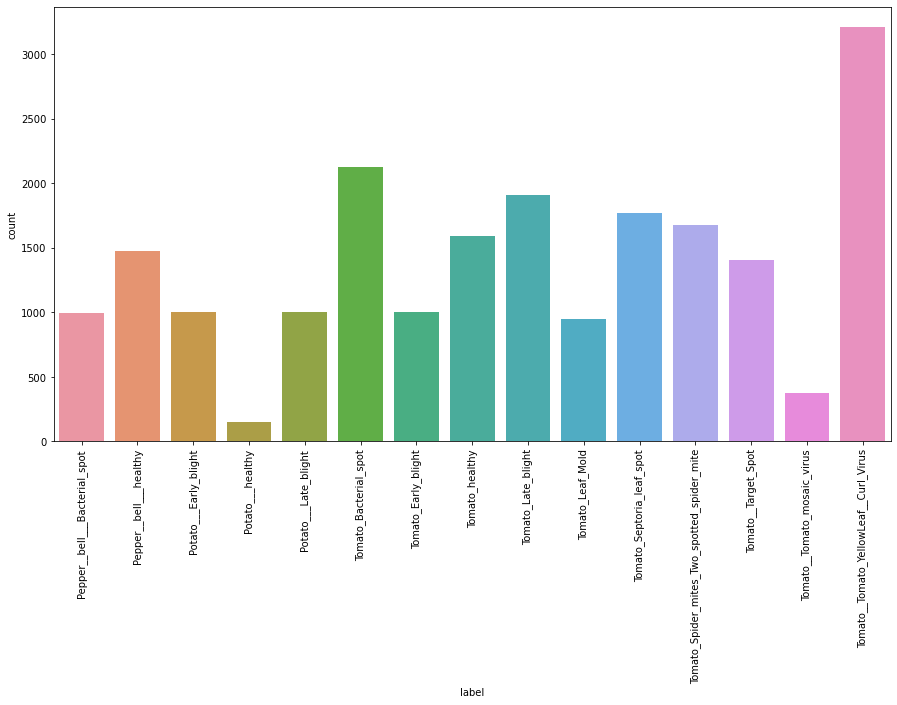

In [66]:
plt.figure(figsize=(15,8))
sns.barplot(x="label", y="count", data=df)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='type', ylabel='count'>

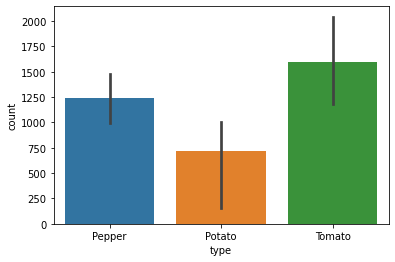

In [67]:
sns.barplot(x="type", y="count", data=df)

In [69]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [159]:
def augment_and_save(directory, files_path, config):
    datagen = ImageDataGenerator(**config)
    generator = datagen.flow_from_directory(
        files_path, 
        batch_size=1,
        class_mode="sparse",
        save_to_dir=directory,
    )
    dummy_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="softmax")
    ])
    dummy_model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["acc"])
    dummy_model.fit(generator, epochs=1, batch_size=1)
    return True

Found 952 images belonging to 1 classes.


In [161]:
def get_current_df():
    class_type_count_1 = {}

    for dir_name in categories:
        file_count = len(os.listdir(os.path.join(dataset_path, dir_name)))
        class_type_count_1[dir_name] = file_count

    data_count_1 = {"label": [], "count": []}

    for c, n in class_type_count_1.items():
        data_count_1["label"].append(c)
        data_count_1["count"].append(n)
    df_1 = pd.DataFrame.from_dict(data_count_1)

    df_1["type"] = df_1["label"].apply(lambda x: x.split("_")[0])
    df_1["disease"] = df_1["label"].apply(clean_names)
    
    return df_1

In [190]:
exceptions = ["Pepper__bell___healthy", "Tomato__Target_Spot", "Tomato_healthy" "Tomato__Tomato_mosaic_virus"]

count_to_rem = 500

for t in os.listdir(dataset_path):
    if t not in exceptions:
        to_delete = os.listdir(os.path.join(dataset_path, t))[-count_to_rem:]
        for f in to_delete:
            os.remove(os.path.join(os.path.join(dataset_path, t), f))

In [194]:
targets = ["Tomato__Tomato_YellowLeaf__Curl_Virus"]

count_to_rem = 1100

for t in os.listdir(dataset_path):
    if t in targets:
        to_delete = os.listdir(os.path.join(dataset_path, t))[-count_to_rem:]
        for f in to_delete:
            os.remove(os.path.join(os.path.join(dataset_path, t), f))

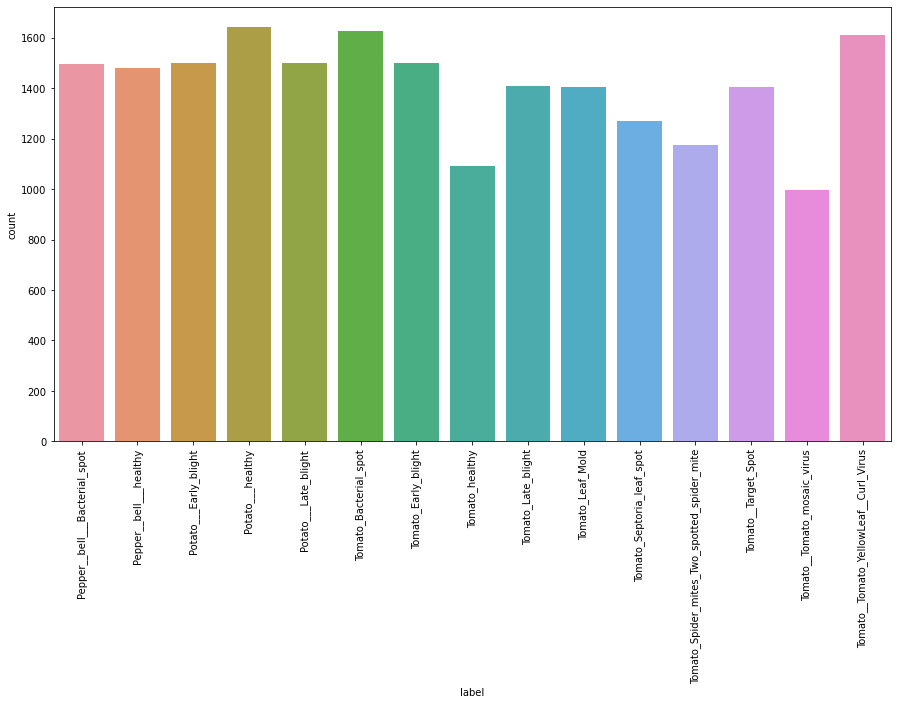

In [195]:
df_1 = get_current_df()

plt.figure(figsize=(15,8))
sns.barplot(x="label", y="count", data=df_1)
plt.xticks(rotation=90);